# Import libraries:

In [1]:
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Collect historical stock data:

In [2]:
def fetch_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Example usage:
ticker = "AAPL"
start_date = "2013-01-01"
end_date = "2023-01-01"
stock_data = fetch_stock_data(ticker, start_date, end_date)

[*********************100%%**********************]  1 of 1 completed


# Data Cleaning and Normalization

In [3]:
def clean_and_normalize_data(data):
    # Handle missing values
    data = data.dropna()

    # Normalize the data
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(data)

    return normalized_data

# Model Training

In [4]:
def train_model(X_train, y_train):
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    return model

# Evaluation

In [5]:
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return mae, mse, r2

# Visualization

In [6]:
def visualize_predictions(actual, predicted):
    plt.figure(figsize=(10, 6))
    plt.plot(actual, label='Actual Prices', color='blue')
    plt.plot(predicted, label='Predicted Prices', color='red')
    plt.title('Stock Price Prediction')
    plt.xlabel('Days')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Main Execution

[*********************100%%**********************]  1 of 1 completed
Mean Absolute Error: 0.02909438151854812
Mean Squared Error: 0.0013782043293897345
R2 Score: 0.9781238177142887


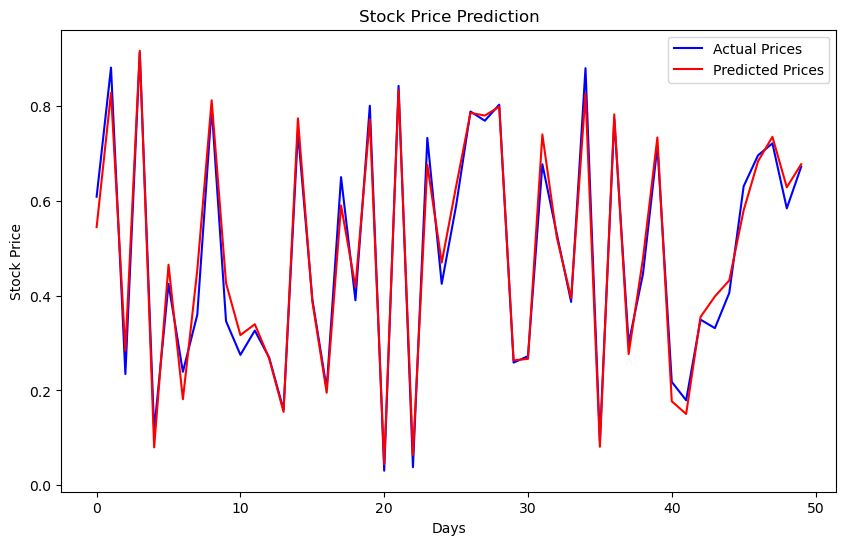

In [7]:
# Example usage:
ticker = "AAPL"
start_date = "2022-01-01"
end_date = "2023-01-01"

# Fetch and clean data
stock_data = fetch_stock_data(ticker, start_date, end_date)
normalized_data = clean_and_normalize_data(stock_data)

# Prepare features and target variable
X = normalized_data[:-1]  # Features
y = normalized_data[1:, 0]  # Target variable (next day's closing price)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = train_model(X_train, y_train)

# Evaluate the model
mae, mse, r2 = evaluate_model(model, X_test, y_test)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

# Visualize predictions
predictions = model.predict(X_test)
visualize_predictions(y_test, predictions)

# Residual Plot: To identify patterns or trends in the errors.

In [8]:
def plot_residuals(y_true, predictions):
    residuals = y_true - predictions
    plt.figure(figsize=(10, 6))
    plt.scatter(predictions, residuals, alpha=0.5)
    plt.title('Residual Plot')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.show()

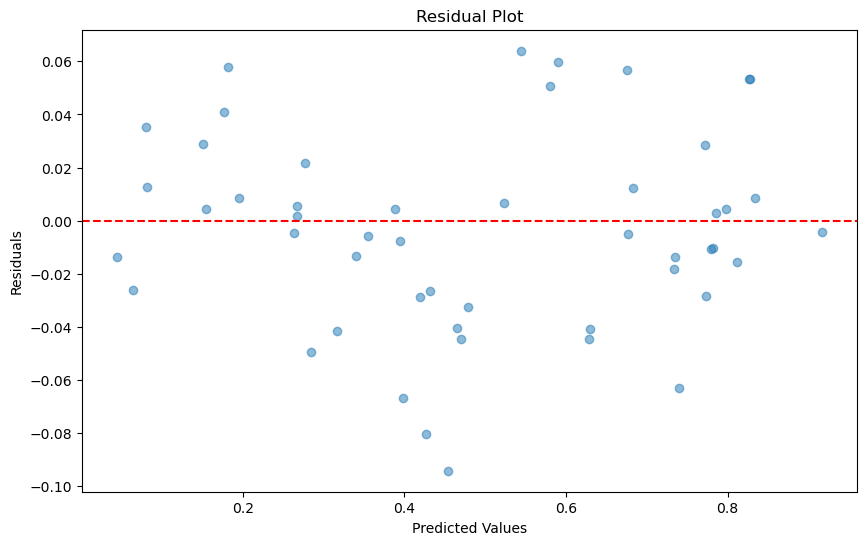

In [9]:
# Plot residuals
plot_residuals(y_test, predictions)

# Distribution of Residuals: To  check if they follow a normal distribution.

In [10]:
def plot_residuals_distribution(residuals):
    plt.figure(figsize=(10, 6))
    plt.hist(residuals, bins=30, edgecolor='k')
    plt.title('Distribution of Residuals')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.show()

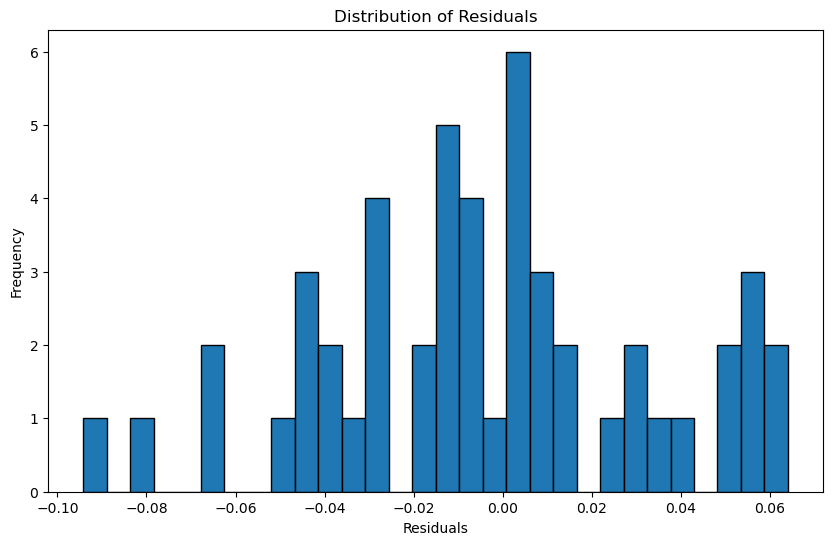

In [11]:
# Plot residuals distribution
plot_residuals_distribution(y_test - predictions)

# Cumulative Returns: To visualize cumulative returns based on predicted stock price movements.

In [12]:
def plot_cumulative_returns(y_true, predictions):
    cumulative_returns_actual = (y_true / y_true[0] - 1).cumsum()
    cumulative_returns_predicted = (predictions / y_true[0] - 1).cumsum()

    plt.figure(figsize=(10, 6))
    plt.plot(cumulative_returns_actual, label='Actual Returns', color='blue')
    plt.plot(cumulative_returns_predicted, label='Predicted Returns', color='red')
    plt.title('Cumulative Returns')
    plt.xlabel('Days')
    plt.ylabel('Cumulative Returns')
    plt.legend()
    plt.show()

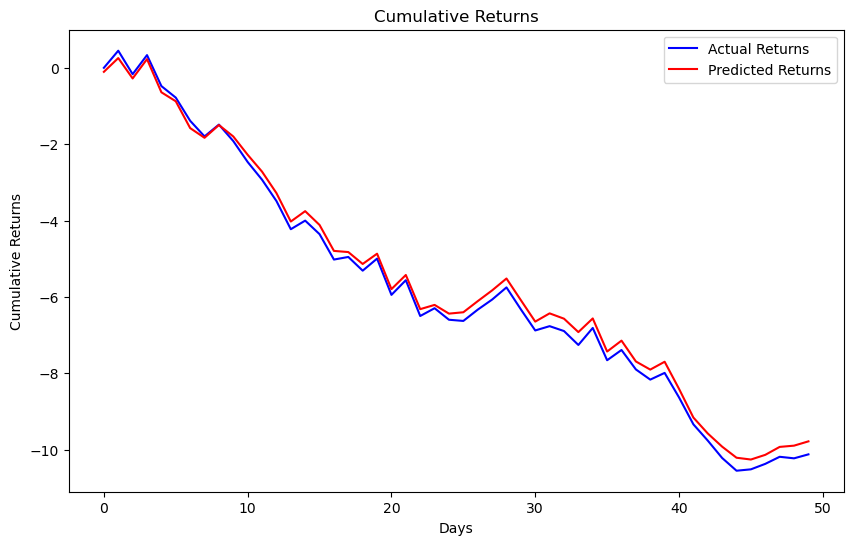

In [13]:
# Plot cumulative returns
plot_cumulative_returns(y_test, predictions)